# Machine Learning in Crowd Modelling and Simulation
# Final Project
# Task 2: Dynamic Model Decomposition

### Group M:
1. Muhammad Waleed Bin Khalid
2. Qais Hamarneh
3. Yiming Zhang

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from DMD import *
from sklearn.decomposition import PCA

%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=6)


In this task, we examine the Dynamic Mode Decomposition algorithm. The DMD algothrim has a simple implementation, which can be found in the DMD class in this project. However, it can be used to fit, embed, reconstruct the data as well as to predict future data. 

## Stochastic Dynamics Example
We start with a simple one dimensional linear example from https://arxiv.org/pdf/1312.0041.pdf. In this example the $\dot{x} = \lambda x + n$, where $n$ is a Gaussian noise and $\lambda$ is a constant decay. 

In [2]:
## Constructing the data
decay = 0.5
timesteps = 1000
noise_scale = 5

stochastic_dynamics = np.zeros((1, timesteps))
stochastic_dynamics[0] = noise_scale

for i in range(1 , timesteps):
    noise = np.random.rand() * 2 * noise_scale - noise_scale
    stochastic_dynamics[0, i] = decay * stochastic_dynamics[0, i - 1] + noise


Since this example is one dimensional, the DMD mode is not so useful. However, the eigenvalue of $\tilde{A}$ is a very good approximation for $\lambda$.

In [3]:
## Fit the data using DMD
dmd = DMD(stochastic_dynamics, time=np.arange(timesteps))
dmd.get_modes(1)
w = dmd.eig_vals

We plot $x_{k+1}$ against $x_{k}$ to track the system dynamic over 1000 time steps. In green, we see the true decay line and in red the line calculated via DMD. 

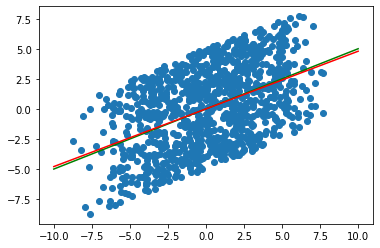

In [4]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(stochastic_dynamics[0, 0:-1], stochastic_dynamics[0, 1:])

x = np.linspace(-2 * noise_scale, 2 * noise_scale, 1000)
ax.plot(x, decay * x, color='green')
ax.plot(x, w * x.T, color='red')

fig.savefig("figures/task_2_linear_noise.png")

## Reconstruction and Prediction

In this example, we look at a simple 2 dimensional linear dataset. However, we use this example to illustrate how to use DMD for reconstructing the original dataset and to predict future data points. 

/Users/qaishamarneh/Projects/Github/ml_cms_final_project/DMD.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  time_dynamics[:, i] = b * np.power(self.eig_vals, time_step / self.dt)
/Users/qaishamarneh/Projects/Github/ml_cms_final_project/DMD.py:94: ComplexWarning: Casting complex values to real discards the imaginary part
  prediction[:, i] = self.b * np.power(self.eig_vals, (len(self.t) + i) * self.dt)


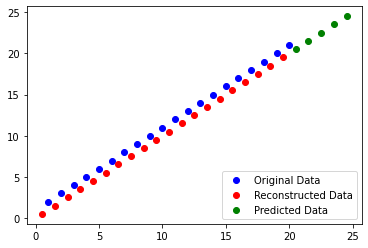

In [5]:
points = 20
X = np.zeros((2, points))
X[0, :] = np.arange(1, points + 1)
X[1, :] = np.arange(2, points + 2)

xdmd = DMD(X, np.arange(points))
dmd_reconstructed_x = xdmd.reconstruct().real
dmd_prediction = xdmd.predict(5).real

fig = plt.figure()
ax = plt.axes()
ax.scatter(X[0, :], X[1, :], color="blue", label="Original Data")

ax.scatter(dmd_reconstructed_x[0, :], dmd_reconstructed_x[1, :], color="red", label="Reconstructed Data")
ax.scatter(dmd_prediction[0, :], dmd_prediction[1, :], color="green", label="Predicted Data")
ax.legend(loc="lower right")

fig.savefig("figures/task_2_simple_reconstruction_predication.png")

## DMD Modes

Now we examine the power of DMD in decomposing the modes governing the data set. In this example we build the dataset as a sum of three functions on the spatial data $x$ and temporal data $t$. The plot of each of the functions as well as the sum is visualized first.

In [6]:
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 4 * np.pi, 80)
dt = t[1] - t[0]

X, T = np.meshgrid(x, t)

f1 = (-0.2*np.power(X, 2)) * np.exp((2.3j)*T)
f2 = X * np.exp(0.6j*T)
f3 = 5 * 1/np.cosh(X/2) * np.tanh(X/2) * 2 * np.exp((0.1+2.8j)*T)

f = f1 + f2 + f3

/Users/qaishamarneh/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


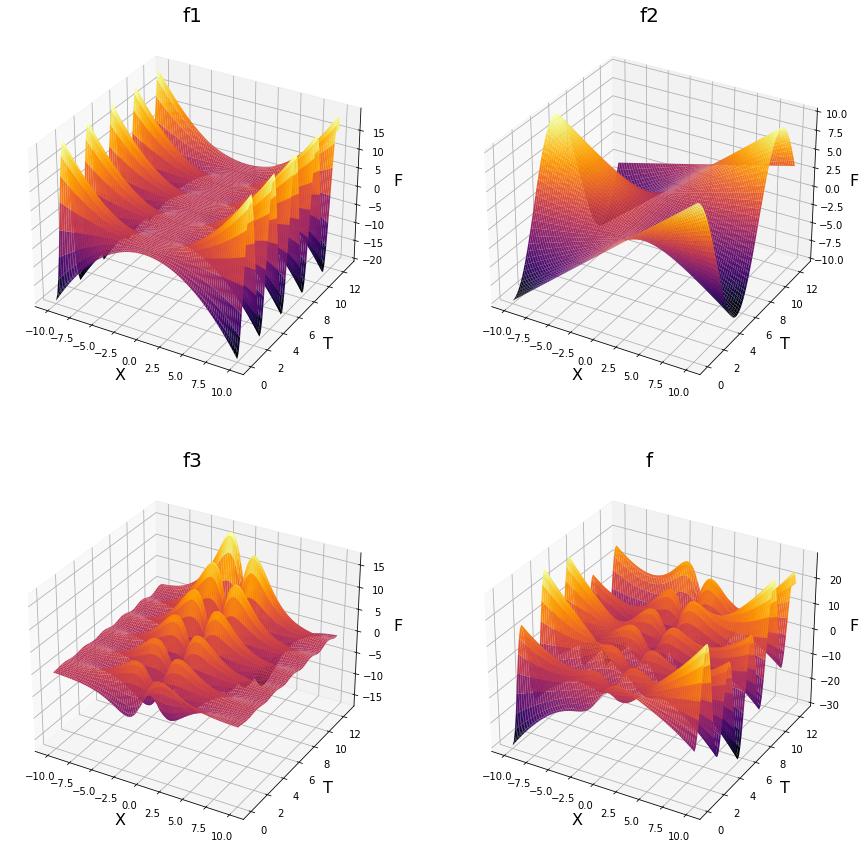

In [7]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(2, 2)
f1_ax = fig.add_subplot(gs[0, 0], projection='3d')
f2_ax = fig.add_subplot(gs[0, 1], projection='3d')
f3_ax = fig.add_subplot(gs[1, 0], projection='3d')
f_ax = fig.add_subplot(gs[1, 1], projection='3d')

f1_ax.plot_surface(X, T, f1, cmap="inferno", rstride=1, cstride=1, alpha=None, antialiased=True)
f1_ax.set_xlabel("X", fontsize=16)
f1_ax.set_ylabel("T", fontsize=16)
f1_ax.set_zlabel("F", fontsize=16)
f1_ax.set_title('f1', fontsize=20);
f2_ax.plot_surface(X, T, f2, cmap="inferno", rstride=1, cstride=1, alpha=None, antialiased=True)
f2_ax.set_xlabel("X", fontsize=16)
f2_ax.set_ylabel("T", fontsize=16)
f2_ax.set_zlabel("F", fontsize=16)
f2_ax.set_title('f2', fontsize=20);

f3_ax.plot_surface(X, T, f3, cmap="inferno", rstride=1, cstride=1, alpha=None, antialiased=True)
f3_ax.set_xlabel("X", fontsize=16)
f3_ax.set_ylabel("T", fontsize=16)
f3_ax.set_zlabel("F", fontsize=16)
f3_ax.set_title('f3', fontsize=20)

f_ax.plot_surface(X, T, f, cmap="inferno", rstride=1, cstride=1, alpha=None, antialiased=True)
f_ax.set_xlabel("X", fontsize=16)
f_ax.set_ylabel("T", fontsize=16)
f_ax.set_zlabel("F", fontsize=16)
f_ax.set_title('f', fontsize=20)

fig.savefig("figures/task_2_3functions.png")

In [8]:
dmd = DMD(f, time=t, transpose=True)
phi = dmd.get_modes(modes = 3)

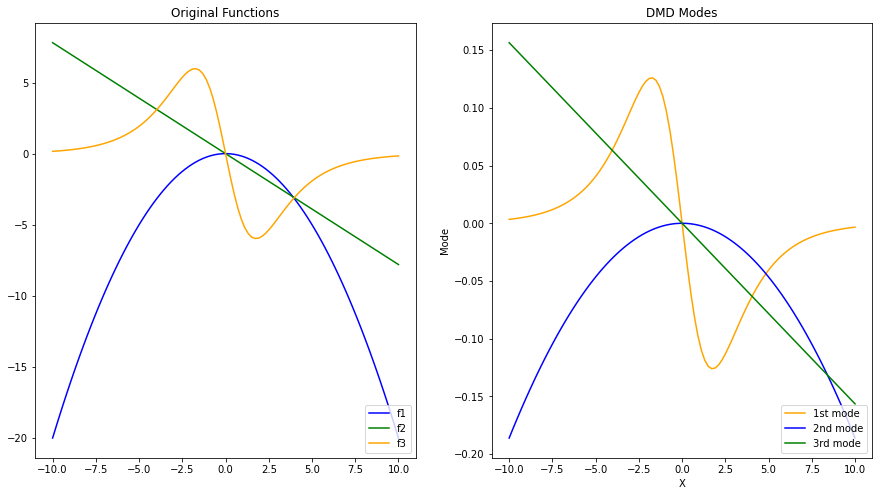

In [9]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.plot(x, f1.real[0,:], color="blue", label="f1")
ax.plot(x, f2.real[40,:], color="green", label="f2")
ax.plot(x, f3.real[20,:], color="orange", label="f3")
ax.legend(loc="lower right")
ax.set_title('Original Functions')

ax = fig.add_subplot(gs[0, 1])
ax.plot(x, phi[:,0].real, color="orange", label="1st mode")
ax.plot(x, phi[:,1].real, color="blue", label="2nd mode")
ax.plot(x, phi[:,2].real, color="green", label="3rd mode")
ax.legend(loc="lower right")
ax.set_xlabel("X")
ax.set_ylabel("Mode")
ax.set_title('DMD Modes')

fig.savefig("figures/task_2_3modes.png")

/Users/qaishamarneh/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


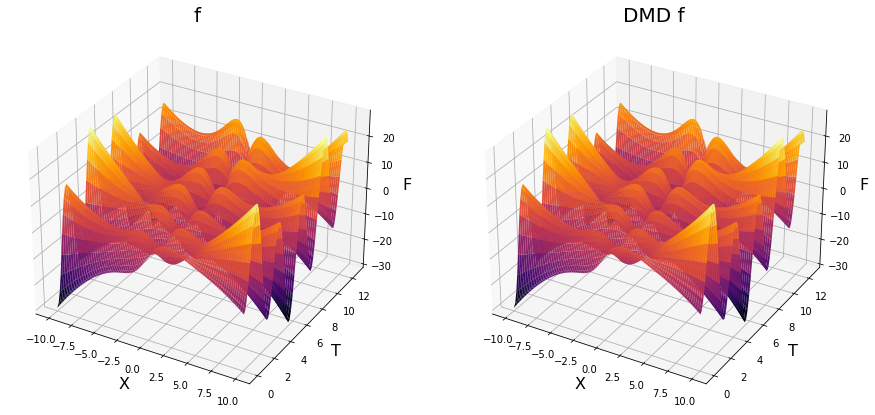

In [10]:
dmd_data = dmd.reconstruct()

fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(1, 2)

f_ax = fig.add_subplot(gs[0, 0], projection='3d')
f_ax.plot_surface(X, T, f, cmap="inferno", rstride=1, cstride=1, alpha=None, antialiased=True)
f_ax.set_xlabel("X", fontsize=16)
f_ax.set_ylabel("T", fontsize=16)
f_ax.set_zlabel("F", fontsize=16)
f_ax.set_title('f', fontsize=20)

phi_ax = fig.add_subplot(gs[0, 1], projection='3d')
phi_ax.plot_surface(X, T, dmd_data.T.real, cmap="inferno", rstride=1, cstride=1, alpha=None, antialiased=True)
phi_ax.set_xlabel("X", fontsize=16)
phi_ax.set_ylabel("T", fontsize=16)
phi_ax.set_zlabel("F", fontsize=16)
phi_ax.set_title('DMD f', fontsize=20)

fig.savefig("figures/task_2_3functions_reconstruction.png")

## Large dataset

In [11]:
fluid_data = np.genfromtxt('../uall.csv', delimiter=',')

In [12]:
fluid_data_dmd = DMD(fluid_data, np.arange(fluid_data.shape[1]))


In [13]:
phi = fluid_data_dmd.get_modes(modes=10)

In [14]:
dmd_reconst_fluid_data = fluid_data_dmd.reconstruct().real

/Users/qaishamarneh/Projects/Github/ml_cms_final_project/DMD.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  time_dynamics[:, i] = b * np.power(self.eig_vals, time_step / self.dt)


In [15]:
data_mean = np.mean(np.sum(fluid_data, axis=0))
mse = np.mean(np.sum(np.power(fluid_data - dmd_reconst_fluid_data, 2), axis=0))
print(f"MSE = {mse} on {fluid_data.shape} data with mean = {data_mean} on axis 0")
data_mean = np.mean(np.sum(fluid_data, axis=1))
mse = np.mean(np.sum(np.power(fluid_data - dmd_reconst_fluid_data, 2), axis=1))
print(f"MSE = {mse} on {fluid_data.shape} data with mean = {data_mean} on axis 1")

MSE = 797.0546128192074 on (89351, 151) data with mean = 74822.03107751465 on axis 0
MSE = 1.3469938393045437 on (89351, 151) data with mean = 126.4465612327196 on axis 1
